In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("datasets/Mall_Customers.csv")

print(df.head())

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# For classification, create categories for Spending_Score
# Example: Low (0-40), Medium (41-70), High (71-100)
def categorize(score):
    if score <= 40:
        return "Low"
    elif score <= 70:
        return "Medium"
    else:
        return "High"

df['SpendingCategory'] = df['Spending_Score'].apply(categorize)

# Features (X) and Target (y)
X = df[['Gender', 'Age', 'Annual Income (k$)']]
y = df['SpendingCategory']


   CustomerID  Gender  Age  Annual Income (k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


In [15]:

from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 5: Train Decision Tree ---
clf = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
clf.fit(X_train, y_train)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
y_pred = clf.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 5  0  1]
 [ 4 10  2]
 [ 2  0 16]]

Classification Report:
               precision    recall  f1-score   support

        High       0.45      0.83      0.59         6
         Low       1.00      0.62      0.77        16
      Medium       0.84      0.89      0.86        18

    accuracy                           0.78        40
   macro avg       0.77      0.78      0.74        40
weighted avg       0.85      0.78      0.79        40



Training Accuracy: 0.875
Testing Accuracy: 0.775


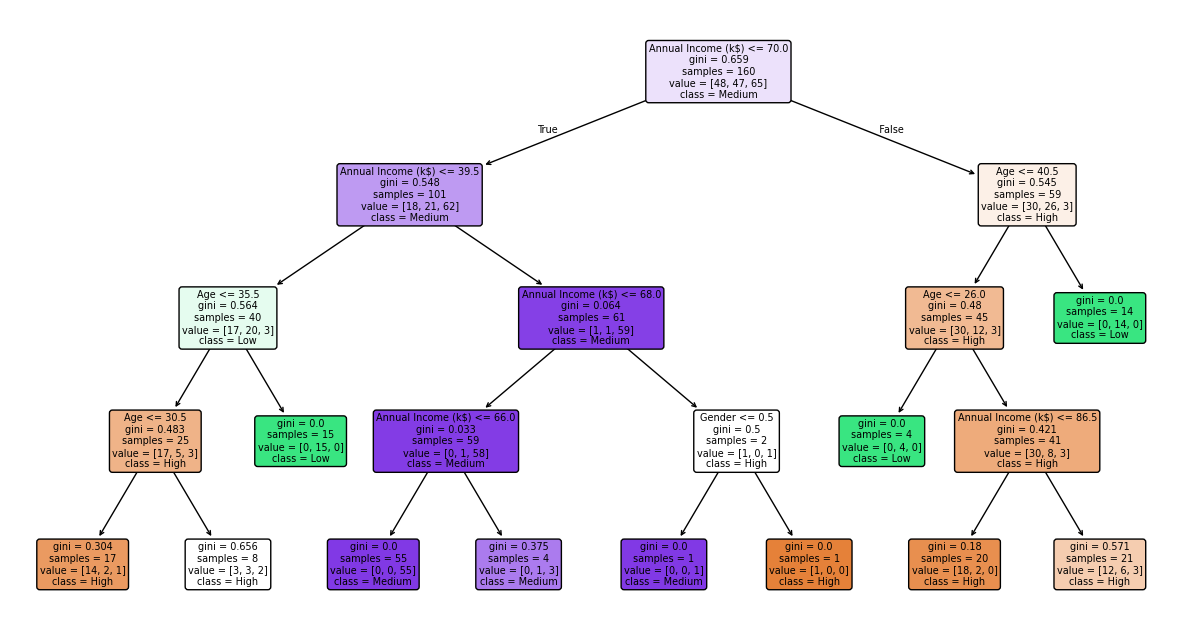

Predicted Spending Category: Medium


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [7]:
plt.figure(figsize=(15,8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.show()

# --- Step 8: Predict Example ---
sample = np.array([[1, 25, 40]])  # Female, Age=25, Income=40k
print("Predicted Spending Category:", clf.predict(sample)[0])


In [9]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("datasets/Mall_Customers.csv")  # assumes columns as you described

# Select features and target
X = df[['Gender', 'Age', 'Annual Income (k$)']]  
y = df['Spending_Score']

# Convert categorical Gender to numeric (Male=0, Female=1)
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

# Discretize Spending_Score into categories (Low, Medium, High)
def categorize(score):
    if score <= 40:
        return "Low"
    elif score <= 70:
        return "Medium"
    else:
        return "High"

y = y.apply(categorize)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 6  0  0]
 [ 5  8  3]
 [ 4  0 14]]

Classification Report:
               precision    recall  f1-score   support

        High       0.40      1.00      0.57         6
         Low       1.00      0.50      0.67        16
      Medium       0.82      0.78      0.80        18

    accuracy                           0.70        40
   macro avg       0.74      0.76      0.68        40
weighted avg       0.83      0.70      0.71        40



/var/folders/h8/_36smvxn3vl_kj9l321n_55w0000gp/T/ipykernel_65127/2946282475.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = le.fit_transform(X['Gender'])
